In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score



OpenFile = open("alt_asc.dat", "r")  
y_asc_arr = eval(OpenFile.read())
y_asc = [ float(i)*0.001 for i in y_asc_arr]


OpenFile = open("alt_desc.dat", "r")  
y_desc_arr = eval(OpenFile.read())
y_desc = [ float(i)*0.001 for i in y_desc_arr]


In [12]:

# Input data
#create X values with the exact same length as the Y data
#x_asc = list(range(0, len(y_asc)))

#get the x axis in seconds
x_asc = [float(i*4.1055) for i in range(len(y_asc))]

#get the x axis in seconds
#x_desc = list(range(0, len(y_desc)))

#get the x axis in seconds
x_desc = [float(i*4.1055) for i in range(len(y_desc))]

#y = np.array([4.5, 10.3, 21.2, 36.6, 60.3])

In [13]:

# Perform exponential regression

# exponential fit to ascend altitude
p_asc = np.polyfit(x_asc, y_asc, 1)
#a_asc = np.exp(p_asc[1])
#b_asc = p_asc[0]

# exponential fit to descend pressure
p_desc = np.polyfit(x_desc, y_desc, 2)
#a_desc = np.exp(p_desc[1])
#b_desc = p_desc[0]


In [14]:
def round_down(value, decimals):
    factor = 1 / (10 ** decimals)
    return (value // factor) * factor

ASC R_squared:0.9954572080280216
ASC climb rate:4.72m/s 283.7m/min intercept:1558.4614759462277


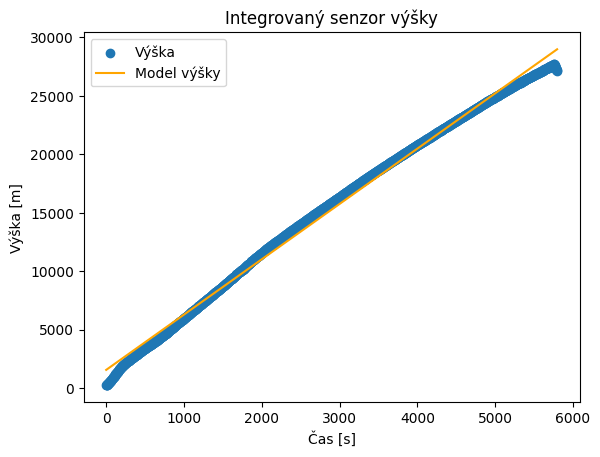

DESC R_squared:0.9934085007724139
DESC climb rate:0.0006178463442554925 -7.657209163191402


In [15]:
# Plot original data and exponential regression line

#plotting the ascend
plt.scatter(x_asc, y_asc)
x_asc = np.array(x_asc, dtype=float)
y_asc = np.array(y_asc, dtype=int)
y_pred_asc= np.polyval(p_asc, x_asc)
plt.xlabel("Čas [s]")
plt.ylabel("Výška [m]")
plt.title("Integrovaný senzor výšky")
plt.plot(x_asc, y_pred_asc,c='orange')
plt.legend(["Výška", "Model výšky"])
plt.savefig('alt_fc_asc.png')

# R^2 is a measure of the quality of the fit
print("ASC R_squared:" + str(r2_score(y_asc,y_pred_asc)))
print("ASC climb rate:" + str(round_down(p_asc[0],2)) + "m/s "+ str(round_down(p_asc[0]*60,2)) +"m/min intercept:" + str(p_asc[1]))
plt.show()

#plotting the desscend
plt.scatter(x_desc, y_desc)
x_desc = np.array(x_desc, dtype=float)
y_desc = np.array(y_desc, dtype=int)
y_pred_desc= np.polyval(p_desc, x_desc)
plt.plot(x_desc, y_pred_desc)

# R^2 is a measure of the quality of the fit
print("DESC R_squared:" + str(r2_score(y_desc,y_pred_desc)))
print("DESC climb rate:" + str(p_desc[0]) + " " + str(p_desc[1]))



# Display graph
plt.show()